In [1]:
from tools import *

In [2]:
import datetime

print(fetch_stock_price("GOOG",
                        datetime.date(2017,1,1),
                        datetime.date(2017,1,31)))

loaded from ./tmp/prices/GOOG_2017-01-01_2017-01-31.pk
[786.14, 786.9, 794.02, 806.15, 806.65, 804.79, 807.91, 806.36, 807.88, 804.61, 806.07, 802.175, 805.02, 819.31, 823.87, 835.67, 832.15, 823.31, 802.32, 796.79]


## visualization

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from tools import fetch_cosine_values, fetch_stock_price, format_dataset
from evaluate_ts import *

In [4]:
# Format the feature and label set
features_size = 5
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, features_size)
print("minibatch_cos_X.shape=", minibatch_cos_X.shape)
print("minibatch_cos_y.shape=", minibatch_cos_y.shape)

minibatch_cos_X.shape= (15, 5)
minibatch_cos_y.shape= (15,)


In [5]:
minibatch_cos_X

array([[ 1.  ,  0.82,  0.21, -0.37, -0.77],
       [ 0.82,  0.21, -0.37, -0.77, -0.93],
       [ 0.21, -0.37, -0.77, -0.93, -0.85],
       [-0.37, -0.77, -0.93, -0.85, -0.23],
       [-0.77, -0.93, -0.85, -0.23,  0.35],
       [-0.93, -0.85, -0.23,  0.35,  0.75],
       [-0.85, -0.23,  0.35,  0.75,  1.01],
       [-0.23,  0.35,  0.75,  1.01,  0.78],
       [ 0.35,  0.75,  1.01,  0.78,  0.25],
       [ 0.75,  1.01,  0.78,  0.25, -0.25],
       [ 1.01,  0.78,  0.25, -0.25, -0.72],
       [ 0.78,  0.25, -0.25, -0.72, -1.05],
       [ 0.25, -0.25, -0.72, -1.05, -0.89],
       [-0.25, -0.72, -1.05, -0.89, -0.29],
       [-0.72, -1.05, -0.89, -0.29,  0.35]])

Observation 0: X=[ 1.    0.82  0.21 -0.37 -0.77] y=-0.9332206274727847
Observation 1: X=[ 0.82  0.21 -0.37 -0.77 -0.93] y=-0.8476237504404999
Observation 2: X=[ 0.21 -0.37 -0.77 -0.93 -0.85] y=-0.23029437843826808
Observation 3: X=[-0.37 -0.77 -0.93 -0.85 -0.23] y=0.35332576672860816
Observation 4: X=[-0.77 -0.93 -0.85 -0.23  0.35] y=0.7470047852159067


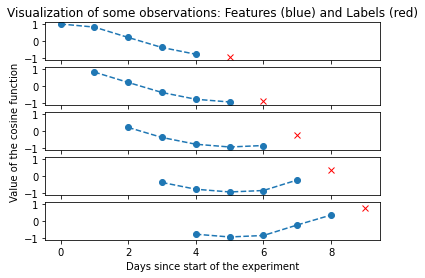

In [6]:
# Print some features of the experiment
samples_to_plot = 5
f, axarr = plt.subplots(samples_to_plot, sharex=True)
for i in range(samples_to_plot):
    feats = minibatch_cos_X[i, :]
    label = minibatch_cos_y[i]

    print("Observation {}: X={} y={}".format(
        i, feats, label
    ))
    # plt.subplot(samples_to_plot, 1, i+1)
    axarr[i].plot(range(i, features_size + i), feats, '--o')
    axarr[i].plot([features_size + i], label, 'rx')
    axarr[i].set_ylim([-1.1, 1.1])

plt.xlabel("Days since start of the experiment")
axarr[2].set_ylabel("Value of the cosine function")
axarr[0].set_title("Visualization of some observations: Features (blue) and Labels (red)")
plt.show()

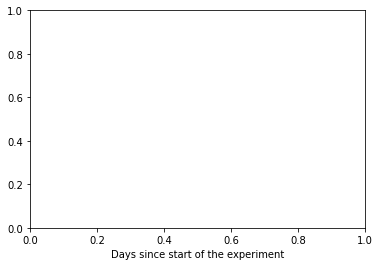

saved into ./tmp/prices/MSFT_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/KO_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/AAL_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/MMM_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/AXP_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/GE_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/GM_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/JPM_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/UPS_2015-01-01_2016-12-31.pk


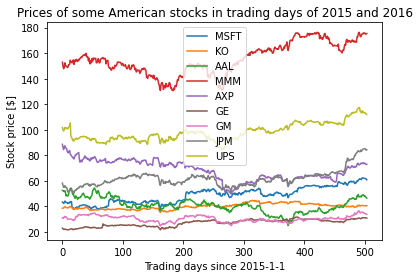

In [7]:
plt.xlabel("Days since start of the experiment")
axarr[2].set_ylabel("Value of the cosine function")
axarr[0].set_title("Visualization of some observations: Features (blue) and Labels (red)")
plt.show()

# Print the stock price of 2015 and 2016 for some stocks
symbols = ["MSFT", "KO", "AAL", "MMM", "AXP", "GE", "GM", "JPM", "UPS"]
ax = plt.subplot(1,1,1)
for sym in symbols:
    prices = fetch_stock_price(
        sym, datetime.date(2015, 1, 1), datetime.date(2016, 12, 31))
    ax.plot(range(len(prices)), prices, label=sym)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.xlabel("Trading days since 2015-1-1")
plt.ylabel("Stock price [$]")
plt.title("Prices of some American stocks in trading days of 2015 and 2016")
plt.show()

## 회귀 모형

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


#tf.reset_default_graph()
tf.random.set_seed(101)

In [24]:
# Settings for the dataset creation
feat_dimension = 20
train_size = 250
test_size = 250

In [25]:
# Settings for tensorflow
learning_rate = 0.01
optimizer = tf.optimizers.Adam()
n_epochs = 10

#### 훈련, 테스트 데이터셋, 관측행렬

In [26]:
# Fetch the values, and prepare the train/test split
cos_values = fetch_cosine_values(train_size + test_size + feat_dimension)
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, feat_dimension)

train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)